<a href="https://colab.research.google.com/github/vvvu/potential-chainsaw/blob/main/pytorch-tutorial/%5BBasics%5D_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [5/60], Loss: 0.9299
Epoch [10/60], Loss: 0.5525
Epoch [15/60], Loss: 0.3995
Epoch [20/60], Loss: 0.3373
Epoch [25/60], Loss: 0.3119
Epoch [30/60], Loss: 0.3014
Epoch [35/60], Loss: 0.2970
Epoch [40/60], Loss: 0.2950
Epoch [45/60], Loss: 0.2940
Epoch [50/60], Loss: 0.2934
Epoch [55/60], Loss: 0.2930
Epoch [60/60], Loss: 0.2926


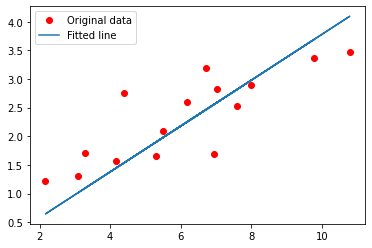

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Hyper Parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
'''
x -> y, 线性模型
'''
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# Train the model
for epoch in range(num_epochs):
  # Numpy array -> Torch tensor
  inputs = torch.from_numpy(x_train)
  targets = torch.from_numpy(y_train)

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Backward and optimize
  optimizer.zero_grad()
  '''
  Set the gradients of all optimizer torch.Tensor s to zero
  - 梯度清零：由于pytorch的动态计算图，当我们使用loss.backward()和opimizer.step()
  进行梯度下降更新参数的时候，梯度并不会自动清零。并且这两个操作是独立操作。所以这里我们需要
  手动进行一次清零
  - In PyTorch, we need to set the gradients to 0 before starting to do BP 
  because PyTorch accumulates the gradietns on subsequent backward passes.
  '''
  loss.backward()
  optimizer.step() # Update all parameters

  if (epoch + 1) % 5 == 0:
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
'''
- It has been firmly established that 'tensor.detach().numpy()' is the correct
way to get a numpy array from a 'torch' tensor
- Related Question => https://stackoverflow.com/questions/63582590/why-do-we-call-detach-before-calling-numpy-on-a-pytorch-tensor
'''
plt.plot(x_train, y_train, 'ro', label = 'Original data')
plt.plot(x_train, predicted, label = 'Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')